#The main discrete probabiliy models 


*   Bernuolli model
*   Binomial model
*   Multinomial model
*   Poission 

### applications:
 data simulation    name.rvs()

 probability mass function  model.pmf()

density estimation  model.pmf()  for all values of x 

cumulative dist function  cdf    model.cdf()


 



#Bernouli model

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mtcars.csv to mtcars.csv


In [ ]:
import pandas as pd
from pandas import read_csv
df=read_csv('mtcars.csv')
df.head(6)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1


# model vs using Bernuolli distibution and estimate p.

In [ ]:
X=df['vs']
X.value_counts()
n=len(X)
phat=sum(X)/n
phat

0.4375

# Example: 
estimate p and predict am in mtcars dataset using Bernoulli model. 



In [ ]:
X=df['am']
X.value_counts()
n=len(X)
phat=sum(X)/n
phat

0.40625

# result: prediction is 0 since p(1)< p(0)

In [ ]:
import seaborn
from scipy.stats import binom, multinom, poisson


#Generate 100 samples of data from a fair coin using Bernoulli model

In [ ]:

from scipy.stats import binom

data=binom.rvs(n=10,p=0.1,size=100)
data

array([2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 2, 1, 1, 3, 2, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 2, 0, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 3, 1,
       1, 0, 1, 2, 0, 2, 2, 2, 1, 1, 4, 3, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1,
       3, 2, 1, 2, 1, 2, 0, 1, 0, 0, 2, 1])

In [ ]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

n,p= 1, 0.2

x=list(range(0,n+1))
x

[0, 1]

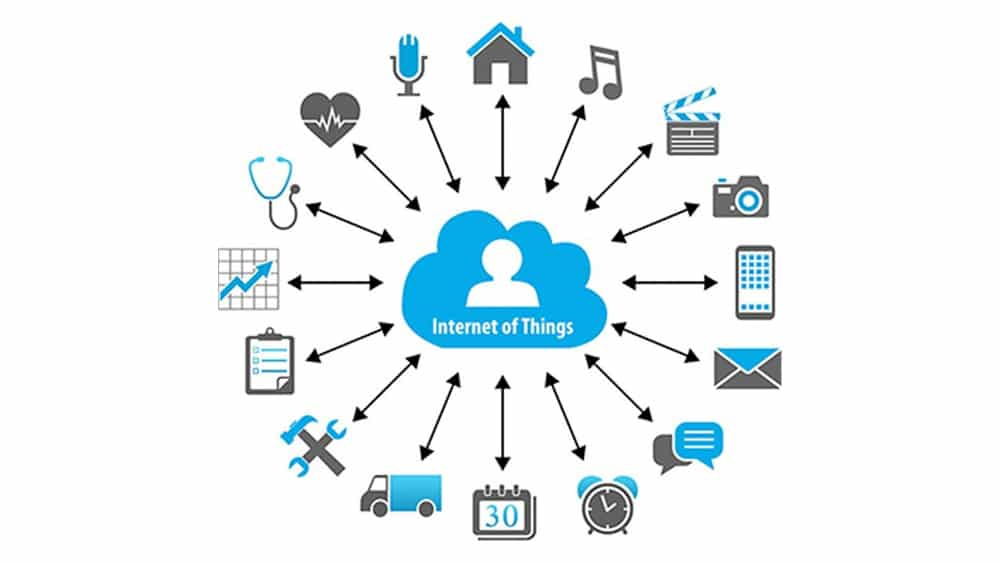

#Example: 
Simulate 100 samples from the above system in which each row indicates the number of connected devices in the time frame. 

In [ ]:
n=16; p=0.8; s=100
data=binom.rvs(n,p,size=s)
from pandas import DataFrame
data=DataFrame(data)
data.columns=['simulated data']
data


In [ ]:
E=17*0.8
E
14

13.600000000000001

#Problem:

The above IOT system is robust if at least 15 devices are properly conntected to the server. If probability of the connection of each device is 0.8. 

What is the probability of the robustness for this system?



In [ ]:
n=16
p=0.8
# P(X>=15)=P(x=15)+P(x=16)
m = binom(n, p) # define the binomial model
#p(x=15)
#P: the probability of the robustness for this system
P=m.pmf(15)+m.pmf(16)
P

0.14073748835532812

# End of week 2

In [ ]:
#cumulative distribution function:  cdf(j)=P(X<=j)
# P=P(X>=15)=1-P(X<=14)=1-cdf(14)

1-m.cdf(14)
x=range(15)
print(x)
sum(m.pmf(x))

range(0, 15)


0.6903775256182804

In [ ]:
m.cdf(14)

0.6903775256182785

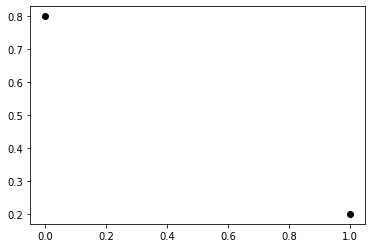

In [ ]:
rv = binom(n, p)
y=rv.pmf(x)
plt.plot(x, y, 'o', color='black') 

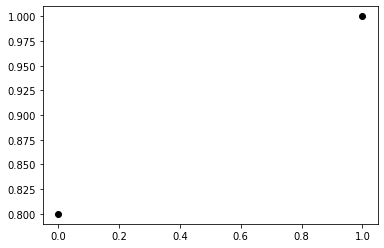

In [ ]:
#cdf
cdf = binom.cdf(x, n, p)
plt.plot(x, cdf, 'o', color='black') 

#Binomial model

In [ ]:
# central and variational measures
X=df['mpg']
import numpy as np
np.var(X)
np.median(X)
np.std(X)
import statistics as st
st.variance(X)
st.stdev(X)

36.32410282258064

In [ ]:
#genrate samples
n,p==10, 0.1
data=binom.rvs(n,p,size=100)
# find the mean and standard deviation
m=data.mean()
s=data.std()
print(m,s)
v=n*p*(1-p) # variance of the model
#sd
import math
s=math.sqrt(v)
s


0.21 0.4073082370883261


0.4

#pmf computation and plotting 

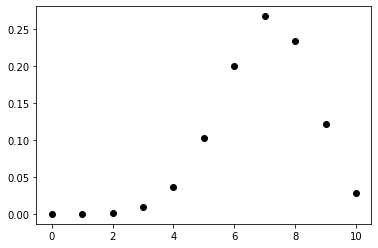

In [ ]:
n,p= 10, 0.7

x=list(range(0,n+1))
rv = binom(n, p)
y=rv.pmf(x)
plt.plot(x, y, 'o', color='black') 

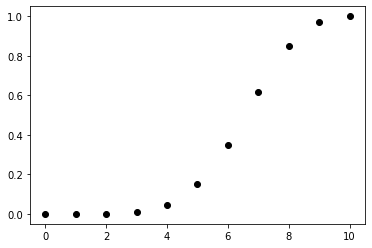

In [ ]:
#cdf
cdf = binom.cdf(x, n, p)
plt.plot(x, cdf, 'o', color='black') 

#In an IOT system, 5 nodes are connected in which each node is sucessfuly connected to the server with p=0.8. generate 100 samples from this network

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial')]

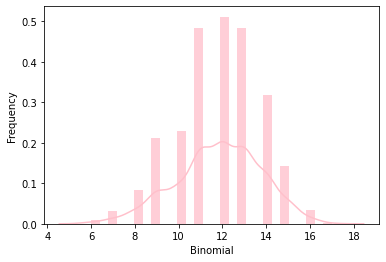

In [ ]:
data=binom.rvs(n=17,p=0.7,loc=0,size=1010)
ax=seaborn.distplot(data,
                kde=True,
                color='pink',
                hist_kws={"linewidth": 22,'alpha':0.77})
ax.set(xlabel='Binomial',ylabel='Frequency')

# Use RAD in boston dataset, find the probability of (1,2,5). 



In [ ]:
from pandas import read_csv
data=read_csv('boston_house_prices.csv')
X=data['RAD']
f=X.value_counts() 
n=3 ; x1=1; x2=1;x3=0;x4=0; x5=1;x6=0;x7=0;x8=0;x24=0
x=[x24,x5,x4,x3,x6,x8,x2,x1,x7]
y=[1,1,1,0,0,0,0,0,0]
p=f/sum(f)
p

24    0.260870
5     0.227273
4     0.217391
3     0.075099
6     0.051383
8     0.047431
2     0.047431
1     0.039526
7     0.033597
Name: RAD, dtype: float64

In [ ]:
from scipy.stats import multinomial

m = multinomial(n,p)
m.pmf(y)

0.07733287506444403

#multinomial model

In [ ]:
from scipy.stats import multinomial
data=multinomial.rvs(1, [0.3, 0.2, 0.5],size=10)
data

# Example:
Generate a dataset from multinomial for the following case study

genrate 10 samples of 4 customers that can belong to 3 groups with probabilities p1=0.1 and p2=0.7


In [ ]:
from scipy.stats import multinomial
data=multinomial.rvs(4, [0.1, 0.7, 0.2],size=10)
data

array([[1, 2, 1],
       [0, 4, 0],
       [1, 2, 1],
       [0, 3, 1],
       [0, 3, 1],
       [0, 3, 1],
       [0, 4, 0],
       [0, 3, 1],
       [0, 4, 0],
       [1, 3, 0]])

#Example:
genrate 2 samples of 10 items that can belong to 5 groups with probabilities the same probability. 

In [ ]:
from numpy import random

In [ ]:
random.seed(123)
data=multinomial.rvs(10, [0.2, 0.2, 0.2,0.2,0.2],size=2)
data

array([[3, 1, 1, 3, 2],
       [3, 1, 4, 1, 1]])

#Example 1:
 Of the 10 products received, 
 
* what is the probability that 8 are excellent, 1 is good and 1 is fair and 0 is poor? Assume that the classification of individual products are independent events and their probabilities are respectively 40%, 20%, 20% and 20% respectively.

* How many products do you expect to be excellent?

In [ ]:
n=10; p=[.4,.2,.2,.2]
model=multinomial(n,p)
#
j=[8,1,1,0]
prob=model.pmf(j)
prob

0.002359296000000007

# Example
model the variable outlook in the play-tennis dataset, compute the chance of having 2 sunny days, 1 overcast and one rainny day in the next 4 days. 

In [ ]:
from pandas import read_csv
data=read_csv('/content/play_tennis.csv')
X=data['outlook']
f=X.value_counts()
p=f/len(X)
n=4; j=[2,1,1]
model=multinomial(n,p)
model.pmf(j)

0.15618492294877143

In [ ]:
from collections import Counter
b = np.transpose(data)
Counter(map(tuple, b.T))

Counter({(0, 0, 1): 7, (0, 1, 0): 1, (1, 0, 0): 2})

In [ ]:
rv = multinomial(8, [0.3, 0.2, 0.5])
rv.pmf([1, 3, 4])

0.04200000000000007

# Throw a dice 20 times, how many time do you observe 5?

In [ ]:
6*[1/6]

[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

In [ ]:
import numpy as np
np.random.multinomial(20, [1/6.]*6, size=1)


array([[7, 4, 1, 1, 3, 4],
       [6, 1, 3, 4, 3, 3],
       [3, 4, 4, 4, 4, 1],
       [5, 2, 5, 3, 4, 1],
       [2, 2, 3, 5, 2, 6],
       [3, 0, 6, 3, 5, 3],
       [5, 2, 4, 3, 3, 3],
       [2, 3, 6, 3, 3, 3],
       [4, 2, 2, 3, 4, 5],
       [5, 4, 2, 1, 6, 2]])

#poisson model

In [ ]:
 s = np.random.poisson(15, 10) # lambda=5
 s

array([18, 12,  9,  5, 17, 12, 17, 13, 13, 11])

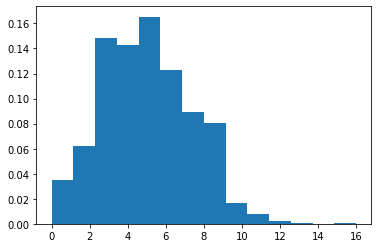

In [ ]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 14, density=True)
plt.show()

In [ ]:
from scipy.stats import poisson
x=list(range(0,20))
pmf = poisson.pmf(x, 5) 
pmf 

array([6.73794700e-03, 3.36897350e-02, 8.42243375e-02, 1.40373896e-01,
       1.75467370e-01, 1.75467370e-01, 1.46222808e-01, 1.04444863e-01,
       6.52780393e-02, 3.62655774e-02, 1.81327887e-02, 8.24217669e-03,
       3.43424029e-03, 1.32086165e-03, 4.71736303e-04, 1.57245434e-04,
       4.91391982e-05, 1.44527054e-05, 4.01464038e-06, 1.05648431e-06])

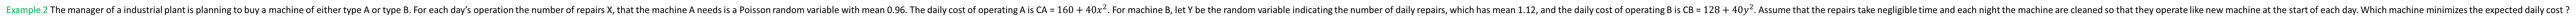

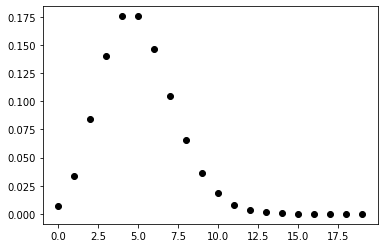

In [ ]:
plt.plot(x, pmf, 'o', color='black') 
 

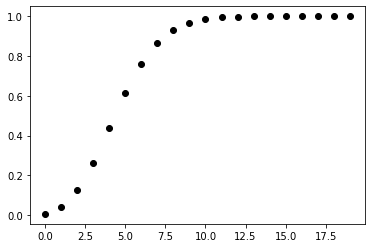

In [ ]:
cdf = poisson.cdf(x, 5) 
plt.plot(x, cdf, 'o', color='black')

#Example:

the number of billboard exposures during one week  is Poisson random variable with mean **3.** 

(a)	Find the probability that no billboard is observed in a week.

(b)	Assume that the number of observed billboards in two different weeks are independent. Find the probability that at least two billboards will be observed in a given two week period.

c) Find p( 3<X<8) if x is poisson with variance 5. 


In [ ]:
lam=3
from scipy.stats import poisson, multinomial
#a P(x=0)
x=0 
pmf = poisson.pmf(x, lam) 
pmf


0.049787068367863944

In [ ]:
#b
rate=6
#P(X>=2)
#1-P(X<=1)
1-poisson.cdf(1,rate)


0.9826487347633355

In [ ]:
#c
#p( 3<X<8)=cdf(7)-cdf(3) if x is poisson with variance 5. 
poisson.cdf(7,5)-poisson.cdf(3,5)

0.601602410632631

# Example

Consider **RAD** in the **boston_house_price** dataset, model it using poisson distribution and compute P(RAD>5)

In [ ]:
from statistics import mean
data_B=read_csv('/content/boston_house_prices.csv')
data_B.head()
X=data_B['RAD']
lam=mean(X)
#1-P(RAD<=5)
1-poisson.cdf(5,lam)

0.9138284830277625

In [ ]:
j=range(15)
pmf=poisson.pmf(j,1)
cdf=poisson.cdf(j,1)
import pandas as pd 
df=pd.DataFrame([j,pmf,cdf])
from numpy import transpose
df=transpose(df)
df.columns=['j','pmf','cdf']
df

5.109437e-04=0.000 

In [ ]:
3.678794e-01=0.3678

#Example 2 

The manager of a industrial plant is planning to buy a machine of either type A or type B. For each day’s operation the number of repairs X, that the machine A needs is a Poisson random variable with mean **0.96**. The daily cost of operating A is CA =160+40𝑥^2. For machine B, let Y be the random variable indicating the number of daily repairs, which has mean **1.12**, and the daily cost of operating B is CB =128+40𝑦^2. Assume that the repairs take negligible time and each night the machine are cleaned so that they operate like new machine at the start of each day. Which machine minimizes the expected daily cost ?


Var(X)=E(X^2)-(E(X)^2)
Var=E=lambda

In [ ]:
Ex=0.96
Vx= 0.96
Vy=1.12
Ey=1.12
E_xsquar=Vx+Ex**2
E_ysquar= Vy+Ey**2 

E_CA=160+40*E_xsquar 

E_CB=128+40*E_ysquar 

[E_CA,E_CB]

[235.264, 222.97600000000003]

# approach B is preferable due to the lower expected value of loss